In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 

In [121]:
df_true = pd.read_csv('True.csv')

In [122]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [123]:
df_true.shape

(21417, 4)

In [124]:
df_fake = pd.read_csv('Fake.csv')

In [125]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [126]:
df_fake.shape

(23481, 4)

# Data Cleaning

In [127]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [128]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


Since we will be basing our model on text data, out column are not relevant to our model; therefor all other columns will be drop except "text".

In [129]:
df_fake =  df_fake.drop_duplicates() #dropping duplicated values

In [130]:
df_fake = df_fake.dropna() #dropping nan values

In [131]:
df_true = df_true.dropna() #dropping nan values

In [132]:
df_fake.info() #checking to see if nan values are dropped 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


In [133]:
df_true.info() #checking to see if nan values are dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [134]:
df_fake = df_fake.drop(columns=['title', 'subject', 'date']) #dropping unused variables

In [135]:
df_fake.sample(5) #sampling the dataset

,text
17631,MSNBC reporter Kasie Hunt began her segment on...
5819,"For months, Republican presidential nominee Do..."
13195,To be honest with you what Donald Trump is sa...
1587,Hours after helping begin to repeal America s ...
8861,Conservatives alongside right-wing media outle...


In [136]:
df_true = df_true.drop(columns=['title', 'date','subject'])

In [137]:
df_true.sample()

,text
10797,WASHINGTON (Reuters) - President Barack Obama ...


We will add a new column that will either be 0 or 1 based on if the news is fake or real. Fake news will be given 0 and real news will be given 1. 

In [138]:
df_fake['Target'] = 0 #adding target column to the dataset

In [139]:
df_fake.sample(5) #sampling the data

,text,Target
4371,Ivanka Trump has been sort of the female face ...,0
14597,An Atlanta Democrat makes some very valid poin...,0
13836,Donald Trump on Wednesday slammed what he desc...,0
18917,New Mexico led all states with 72 percent of t...,0
12542,It s good to know Hillary s Campaign Chairman ...,0


In [140]:
df_true['Target'] = 1 #adding target column to the data

In [141]:
df_true.sample(5) #sample of the dataset aftering adding "Target" column

,text,Target
1857,SAN FRANCISCO (Reuters) - Facebook Inc said on...,1
4982,WASHINGTON (Reuters) - The U.S. Senate confirm...,1
17225,BERLIN (Reuters) - Chancellor Angela Merkel wo...,1
4037,WASHINGTON (Reuters) - A U.S. appeals court on...,1
18604,MILAN (Reuters) - North Korea s ambassador to ...,1


Now we will concat both dataset into metadata

In [142]:
data = pd.concat([df_fake, df_true]) #concat the two dataset

In [143]:
data.sample(5) #sample of the dataset

,text,Target
12465,TIRANA (Reuters) - Albania will upgrade its ro...,1
11626,LONDON (Reuters) - Pro-European campaigners ac...,1
13146,TOKYO (Reuters) - Japan is preparing to acquir...,1
10870,"In the realm of the NBA, Spurs head coach Greg...",0
19558,"LAHORE, Pakistan (Reuters) - The head of a new...",1


# EDA

In [144]:
data

,text,Target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [145]:
data['Target'].value_counts() 

0    23478
1    21417
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4cffb26dd0>,
 [Text(-0.07925311595859819, 1.09714125964292, 'Real'),
  Text(0.07925311595859781, -1.09714125964292, 'Fake')],
 [Text(-0.04322897234105355, 0.5984406870779563, '52.30'),
  Text(0.04322897234105334, -0.5984406870779563, '47.70')])

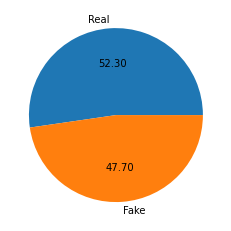

In [146]:
plt.pie(data['Target'].value_counts(), labels=['Real', 'Fake'], autopct="%0.2f") #pie plot of the data

Observation : The data tells us that is a slight imbalance in the data. There is more data that is real than fake news. 

In [147]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/jawadkhattak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [148]:
data['NumberOfCharacters'] = data['text'].apply(len) #Finding length of each text

In [149]:
data.sample(5) #sampling the data to see if the new variable is added

,text,Target,NumberOfCharacters
2899,"Since 1945, the United States has been a cruci...",0,2990
6594,MOSCOW (Reuters) - The U.S. presidential elect...,1,239
11924,BERLIN (Reuters) - German federal prosecutors ...,1,851
19336,BRUSSELS (Reuters) - The European Union s Brex...,1,1448
13461,OBAMA LIES AND SPINS HIS WAY THROUGH A BS SPEE...,0,62


In [150]:
data.describe() #checking to see how our data look

,Target,NumberOfCharacters
count,44895.000000,44895.000000
mean,0.477046,2469.187950
std,0.499478,2171.663707
min,0.000000,1.000000
25%,0.000000,1234.000000
50%,0.000000,2186.000000
75%,1.000000,3105.500000
max,1.000000,51794.000000


The statistical analysis of the dataframe shows that there is/are text that has only one word. This won't help us our modle so we will drop text that length of 1. 

In [151]:
data[data['text'].str.len() <= 1]

,text,Target,NumberOfCharacters
10923,,0,1
11041,,0,1
11190,,0,1
11225,,0,1
11236,,0,1
...,...,...,...
21826,,0,1
21827,,0,1
21857,,0,1
21873,,0,1


In [152]:
data[data['text'].str.len() <= 5]['text'].value_counts()

         627
           4
Ouch!      2
Name: text, dtype: int64

We will drop these text because they are too small to test our model upon. 

In [153]:
data.shape

(44895, 3)

In [154]:
data

,text,Target,NumberOfCharacters
0,Donald Trump just couldn t wish all Americans ...,0,2893
1,House Intelligence Committee Chairman Devin Nu...,0,1898
2,"On Friday, it was revealed that former Milwauk...",0,3597
3,"On Christmas day, Donald Trump announced that ...",0,2774
4,Pope Francis used his annual Christmas Day mes...,0,2346
...,...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,2821
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1,800
21414,MINSK (Reuters) - In the shadow of disused Sov...,1,1950
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1,1199


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44895 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                44895 non-null  object
 1   Target              44895 non-null  int64 
 2   NumberOfCharacters  44895 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [171]:
data[data['text'].str.strip().str.len() >= 1]

,text,Target,NumberOfCharacters
0,Donald Trump just couldn t wish all Americans ...,0,2893
1,House Intelligence Committee Chairman Devin Nu...,0,1898
2,"On Friday, it was revealed that former Milwauk...",0,3597
3,"On Christmas day, Donald Trump announced that ...",0,2774
4,Pope Francis used his annual Christmas Day mes...,0,2346
...,...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,2821
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1,800
21414,MINSK (Reuters) - In the shadow of disused Sov...,1,1950
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1,1199


In [181]:
data['NumberOfWords'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipykernel_7496/1524923495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumberOfWords'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [182]:
data['NumberOfSentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipykernel_7496/1829143346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumberOfSentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [184]:
data.head()

,text,Target,NumberOfCharacters,NumberOfWords,NumberOfSentences
0,Donald Trump just couldn t wish all Americans ...,0,2893,599,28
1,House Intelligence Committee Chairman Devin Nu...,0,1898,331,11
2,"On Friday, it was revealed that former Milwauk...",0,3597,689,25
3,"On Christmas day, Donald Trump announced that ...",0,2774,519,15
4,Pope Francis used his annual Christmas Day mes...,0,2346,458,19


In [188]:
data[['NumberOfCharacters', 'NumberOfWords', 'NumberOfSentences']].describe()

,NumberOfCharacters,NumberOfWords,NumberOfSentences
count,44264.000000,44264.000000,44264.000000
mean,2504.372809,459.924069,15.084086
std,2166.857702,393.833189,12.658537
min,5.000000,1.000000,1.000000
25%,1293.000000,236.000000,7.000000
50%,2209.000000,407.000000,13.000000
75%,3126.000000,576.000000,20.000000
max,51794.000000,9958.000000,321.000000


In [186]:
data['NumberOfSentences'].describe()

count    44264.000000
mean        15.084086
std         12.658537
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max        321.000000
Name: NumberOfSentences, dtype: float64

In [192]:
#Fake News
data[data['Target'] ==0][['NumberOfCharacters', 'NumberOfWords', 'NumberOfSentences']].describe()

,NumberOfCharacters,NumberOfWords,NumberOfSentences
count,22848.000000,22848.000000,22848.000000
mean,2617.773241,483.028974,15.331408
std,2531.650609,456.630836,13.754551
min,5.000000,1.000000,1.000000
25%,1517.750000,280.000000,8.000000
50%,2200.000000,409.000000,13.000000
75%,3059.000000,568.000000,19.000000
max,51794.000000,9958.000000,288.000000


In [193]:
#Real News
data[data['Target'] ==1][['NumberOfCharacters', 'NumberOfWords', 'NumberOfSentences']].describe()

,NumberOfCharacters,NumberOfWords,NumberOfSentences
count,21416.000000,21416.000000,21416.000000
mean,2383.389755,435.274234,14.820228
std,1684.796417,311.377905,11.367772
min,152.000000,25.000000,1.000000
25%,914.000000,168.000000,6.000000
50%,2222.000000,404.000000,13.000000
75%,3237.000000,589.000000,20.000000
max,29781.000000,5979.000000,321.000000


/tmp/ipykernel_7496/4094327692.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[data['Target']==0]['NumberOfCharacters'], kde=True, multiple="stack", palette="husl")
/tmp/ipykernel_7496/4094327692.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[data['Target']==1]['NumberOfCharacters'], color = 'red', kde=True, multiple="stack", palette="husl")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


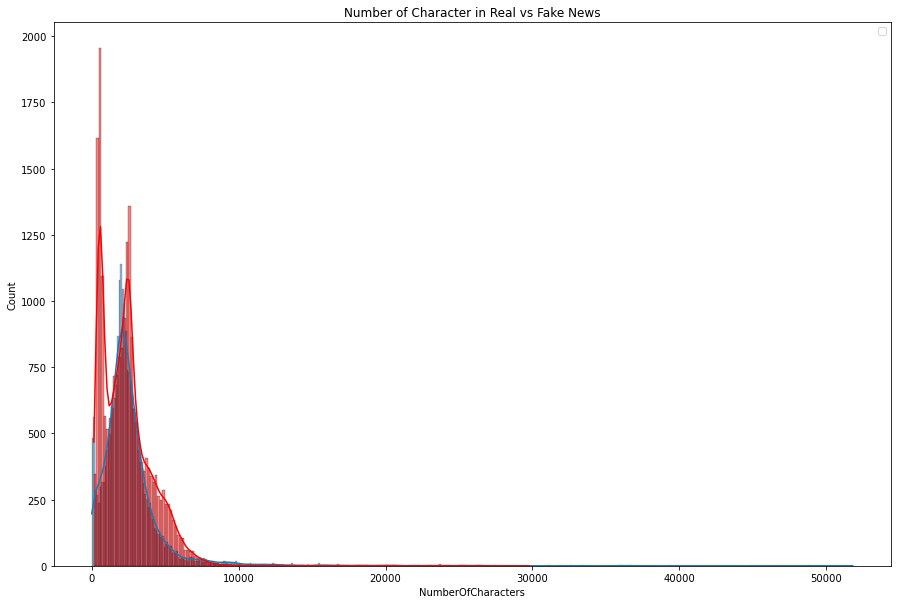

In [211]:
plt.figure(figsize=(15,10))
sns.histplot(data[data['Target']==0]['NumberOfCharacters'], kde=True, multiple="stack", palette="husl")
sns.histplot(data[data['Target']==1]['NumberOfCharacters'], color = 'red', kde=True, multiple="stack", palette="husl")
plt.title('Number of Character in Real vs Fake News')
plt.legend()

/tmp/ipykernel_7496/2252844288.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[data['Target']==0]['NumberOfWords'], kde=True, multiple="stack", palette="husl")
/tmp/ipykernel_7496/2252844288.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[data['Target']==1]['NumberOfWords'], color = 'red', kde=True, multiple="stack", palette="husl")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


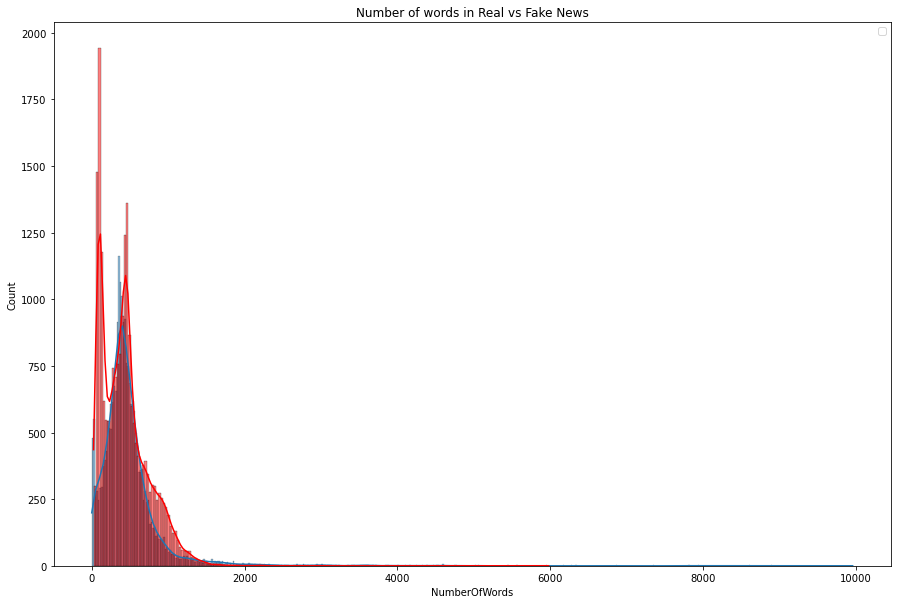

In [218]:
plt.figure(figsize=(15,10))
sns.histplot(data[data['Target']==0]['NumberOfWords'], kde=True, multiple="stack", palette="husl")
sns.histplot(data[data['Target']==1]['NumberOfWords'], color = 'red', kde=True, multiple="stack", palette="husl")
plt.title('Number of words in Real vs Fake News')
plt.legend()

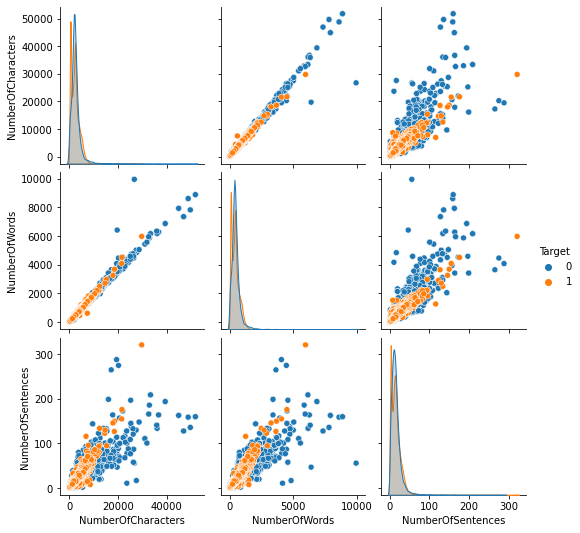

In [214]:
sns.pairplot(data, hue='Target')

Observation: The pairplot above shows that number of words, sentences and characters are bigger and longer in fake news compared to real news

/tmp/ipykernel_7496/1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot:>

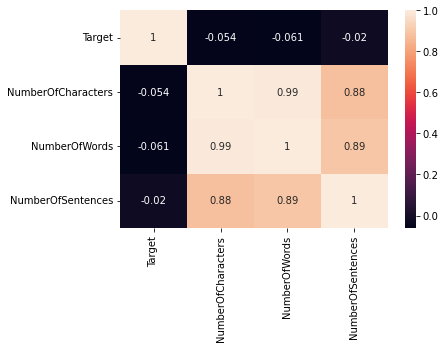

In [219]:
sns.heatmap(data.corr(), annot=True)

# Data Preprocessing